#PELD


##Packages

In [1]:
#BERT
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.6 MB/s eta 0:00:00


In [3]:
#Load data
import pandas as pd

#Preprocessing
import string
import nltk
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

#Stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#Plots
import seaborn as sns
import matplotlib.pyplot as plt

#Labels
from sklearn.preprocessing import LabelEncoder

#Train/test/val split¶
from sklearn.model_selection import train_test_split

#Vectorization
import tensorflow as tf
from transformers import DistilBertTokenizerFast
from nltk.tokenize import word_tokenize

#BERT
from transformers import TFDistilBertForSequenceClassification

#Evaluation
import numpy as np
from sklearn.metrics import classification_report

#RoBERTa
from transformers import AutoTokenizer
from transformers import TFAutoModelForSequenceClassification

#DeBERTa
from transformers import AutoTokenizer, TFDebertaForSequenceClassification

#SVM
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

#TF-iDF
from sklearn.feature_extraction.text import TfidfVectorizer

#Random
import random

#RNN
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Load data

In [ ]:
df_PELD = pd.read_excel('/content/drive/MyDrive/PELD.xlsx')
df_PELD

,Speaker_1,Speaker_2,Personality,Utterance_1,Utterance_2,Utterance_3,Emotion_1,Emotion_2,Emotion_3,Sentiment_1,Sentiment_2,Sentiment_3
0,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",also I was the point person on my company s tr...,You must ve had your hands full.,That I did. That I did.,neutral,neutral,neutral,neutral,neutral,neutral
1,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",That I did. That I did.,So let s talk a little bit about your duties.,My duties? All right.,neutral,neutral,surprise,neutral,neutral,positive
2,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",My duties? All right.,"Now you ll be heading a whole division, so you...",I see.,surprise,neutral,neutral,positive,neutral,neutral
3,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",I see.,But there ll be perhaps 30 people under you so...,Good to know.,neutral,neutral,neutral,neutral,neutral,neutral
4,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",Good to know.,We can go into detail,No don t I beg of you!,neutral,neutral,fear,neutral,neutral,negative
...,...,...,...,...,...,...,...,...,...,...,...,...
6504,Phoebe,Monica,"[0.6, 0.48, 0.31, 0.46, 0.56]",Me too.,In like a half-hour?,Me too.,neutral,neutral,neutral,neutral,neutral,neutral
6505,Monica,Phoebe,"[0.713, 0.457, 0.457, 0.66, 0.511]",In like a half-hour?,Me too.,"Okay, throw it straight this time.",neutral,neutral,neutral,neutral,neutral,neutral
6506,Phoebe,Monica,"[0.6, 0.48, 0.31, 0.46, 0.56]",Me too.,"Okay, throw it straight this time.",Okay.,neutral,neutral,neutral,neutral,neutral,neutral
6507,Monica,Phoebe,"[0.713, 0.457, 0.457, 0.66, 0.511]","Okay, throw it straight this time.",Okay.,I'm getting married next!!,neutral,neutral,joy,neutral,neutral,positive


##Data exploration

In [ ]:
df_PELD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6509 entries, 0 to 6508
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Speaker_1    6509 non-null   object
 1   Speaker_2    6509 non-null   object
 2   Personality  6509 non-null   object
 3   Utterance_1  6509 non-null   object
 4   Utterance_2  6509 non-null   object
 5   Utterance_3  6509 non-null   object
 6   Emotion_1    6509 non-null   object
 7   Emotion_2    6509 non-null   object
 8   Emotion_3    6509 non-null   object
 9   Sentiment_1  6509 non-null   object
 10  Sentiment_2  6509 non-null   object
 11  Sentiment_3  6509 non-null   object
dtypes: object(12)
memory usage: 610.3+ KB


In [ ]:
df_PELD.describe()

,Speaker_1,Speaker_2,Personality,Utterance_1,Utterance_2,Utterance_3,Emotion_1,Emotion_2,Emotion_3,Sentiment_1,Sentiment_2,Sentiment_3
count,6509,6509,6509,6509,6509,6509,6509,6509,6509,6509,6509,6509
unique,6,268,6,5499,5456,5521,7,7,7,3,3,3
top,Rachel,Rachel,"[0.635, 0.354, 0.521, 0.552, 0.469]",What?,What?,What?,neutral,neutral,neutral,neutral,neutral,neutral
freq,1156,943,1156,85,103,88,2910,3020,2770,2910,3020,2770


<ipython-input-5-479defe475f7>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  histplot.set_xticklabels(histplot.get_xticklabels(), rotation=45, ha='right', fontsize=10, color='purple')


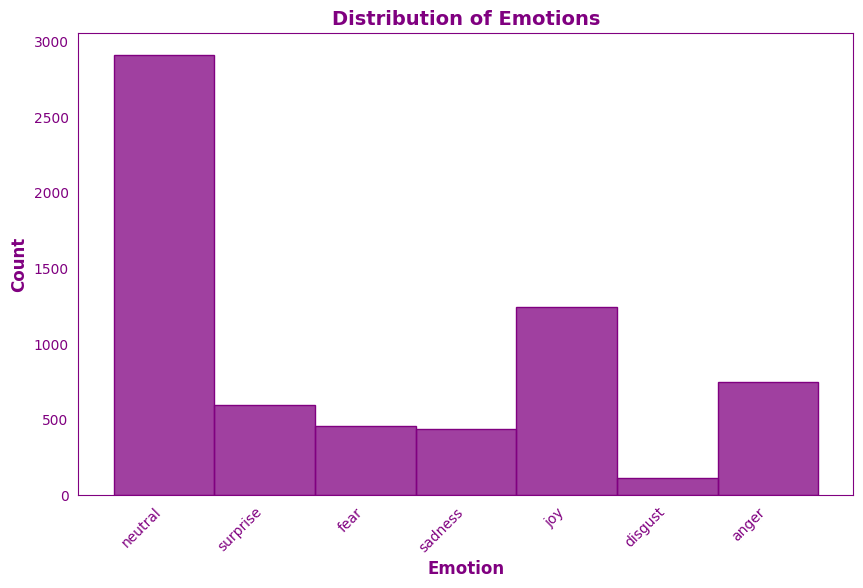

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("white")

histplot = sns.histplot(data=df_PELD, x='Emotion_1', color='purple', edgecolor='purple')

histplot.set_xlabel('Emotion', fontsize=12, fontweight='bold', color='purple')
histplot.set_ylabel('Count', fontsize=12, fontweight='bold', color='purple')
histplot.set_title('Distribution of Emotions', fontsize=14, fontweight='bold', color='purple')

histplot.set_xticklabels(histplot.get_xticklabels(), rotation=45, ha='right', fontsize=10, color='purple')

histplot.tick_params(axis='both', colors='purple')
histplot.spines['bottom'].set_color('purple')
histplot.spines['left'].set_color('purple')
histplot.spines['right'].set_color('purple')
histplot.spines['top'].set_color('purple')

histplot.grid(False)

plt.show()


<ipython-input-6-20118310e14b>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  histplot.set_xticklabels(histplot.get_xticklabels(), rotation=45, ha='right', fontsize=10, color='purple')


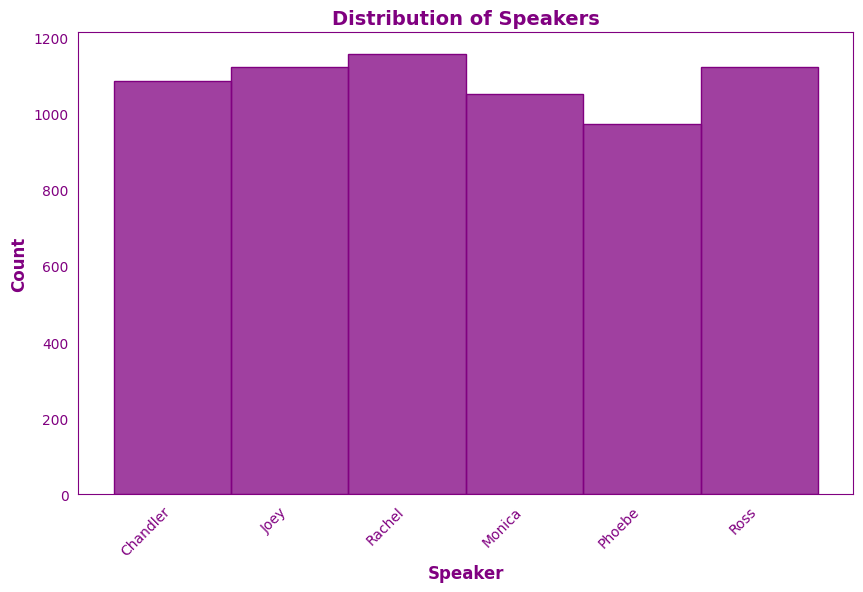

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("white")

histplot = sns.histplot(data=df_PELD, x='Speaker_1',  color='purple', edgecolor='purple')

histplot.set_xlabel('Speaker', fontsize=12, fontweight='bold', color='purple')
histplot.set_ylabel('Count', fontsize=12, fontweight='bold', color='purple')
histplot.set_title('Distribution of Speakers', fontsize=14, fontweight='bold', color='purple')

histplot.set_xticklabels(histplot.get_xticklabels(), rotation=45, ha='right', fontsize=10, color='purple')

histplot.tick_params(axis='both', colors='purple')
histplot.spines['bottom'].set_color('purple')
histplot.spines['left'].set_color('purple')
histplot.spines['right'].set_color('purple')
histplot.spines['top'].set_color('purple')

histplot.grid(False)

plt.show()

In [ ]:
#Tokenization
df_PELD['tokens'] = df_PELD['Utterance_1'].apply(word_tokenize)

#Measures
df_PELD['token_count'] = df_PELD['tokens'].apply(len)

max_tokens = np.max(df_PELD['token_count'])
min_tokens = np.min(df_PELD['token_count'])
mean_tokens = np.mean(df_PELD['token_count'])

#Results
print("Max Tokens:", max_tokens)
print("Min Tokens:", min_tokens)
print("Mean Tokens:", mean_tokens)


Max Tokens: 91
Min Tokens: 1
Mean Tokens: 11.24412352127823


##Preprocessing data

In [ ]:
df_PELD[['Openess', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Stability']] = df_PELD["Personality"].str.split(",", expand=True)
#remove the '[' character from all rows
df_PELD['Openess'] = df_PELD['Openess'].str.replace('[', '')
df_PELD['Stability'] = df_PELD['Stability'].str.replace(']', '')
df_PELD

<ipython-input-5-d77c1370c176>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_PELD['Openess'] = df_PELD['Openess'].str.replace('[', '')
<ipython-input-5-d77c1370c176>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_PELD['Stability'] = df_PELD['Stability'].str.replace(']', '')


,Speaker_1,Speaker_2,Personality,Utterance_1,Utterance_2,Utterance_3,Emotion_1,Emotion_2,Emotion_3,Sentiment_1,Sentiment_2,Sentiment_3,Openess,Conscientiousness,Extraversion,Agreeableness,Stability
0,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",also I was the point person on my company s tr...,You must ve had your hands full.,That I did. That I did.,neutral,neutral,neutral,neutral,neutral,neutral,0.648,0.375,0.386,0.58,0.477
1,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",That I did. That I did.,So let s talk a little bit about your duties.,My duties? All right.,neutral,neutral,surprise,neutral,neutral,positive,0.648,0.375,0.386,0.58,0.477
2,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",My duties? All right.,"Now you ll be heading a whole division, so you...",I see.,surprise,neutral,neutral,positive,neutral,neutral,0.648,0.375,0.386,0.58,0.477
3,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",I see.,But there ll be perhaps 30 people under you so...,Good to know.,neutral,neutral,neutral,neutral,neutral,neutral,0.648,0.375,0.386,0.58,0.477
4,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",Good to know.,We can go into detail,No don t I beg of you!,neutral,neutral,fear,neutral,neutral,negative,0.648,0.375,0.386,0.58,0.477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6504,Phoebe,Monica,"[0.6, 0.48, 0.31, 0.46, 0.56]",Me too.,In like a half-hour?,Me too.,neutral,neutral,neutral,neutral,neutral,neutral,0.6,0.48,0.31,0.46,0.56
6505,Monica,Phoebe,"[0.713, 0.457, 0.457, 0.66, 0.511]",In like a half-hour?,Me too.,"Okay, throw it straight this time.",neutral,neutral,neutral,neutral,neutral,neutral,0.713,0.457,0.457,0.66,0.511
6506,Phoebe,Monica,"[0.6, 0.48, 0.31, 0.46, 0.56]",Me too.,"Okay, throw it straight this time.",Okay.,neutral,neutral,neutral,neutral,neutral,neutral,0.6,0.48,0.31,0.46,0.56
6507,Monica,Phoebe,"[0.713, 0.457, 0.457, 0.66, 0.511]","Okay, throw it straight this time.",Okay.,I'm getting married next!!,neutral,neutral,joy,neutral,neutral,positive,0.713,0.457,0.457,0.66,0.511


In [ ]:
#Encode emotions
label_encoder = LabelEncoder()

label_encoder.fit(df_PELD['Emotion_1'])

df_PELD['encoded_emotion'] = label_encoder.transform(df_PELD['Emotion_1'])


In [ ]:
#Encode openness
label_encoder = LabelEncoder()

label_encoder.fit(df_PELD['Openess'])

df_PELD['encoded_openess'] = label_encoder.transform(df_PELD['Openess'])

In [ ]:
#Encode conscientiousness
label_encoder = LabelEncoder()

label_encoder.fit(df_PELD['Conscientiousness'])

df_PELD['encoded_conscientiousness'] = label_encoder.transform(df_PELD['Conscientiousness'])

In [ ]:
#Encode extraversion
label_encoder = LabelEncoder()

label_encoder.fit(df_PELD['Extraversion'])

df_PELD['encoded_extraversion'] = label_encoder.transform(df_PELD['Extraversion'])

In [ ]:
#Encode agreeableness
label_encoder = LabelEncoder()

label_encoder.fit(df_PELD['Agreeableness'])

df_PELD['encoded_agreeableness'] = label_encoder.transform(df_PELD['Agreeableness'])

In [ ]:
#Encode stability
label_encoder = LabelEncoder()

label_encoder.fit(df_PELD['Stability'])

df_PELD['encoded_stability'] = label_encoder.transform(df_PELD['Stability'])

In [ ]:
#Binary variables
df_PELD['Sadness'] = np.where(df_PELD['Emotion_1'] == 'sadness', 1, 0)
df_PELD['Joy'] = np.where(df_PELD['Emotion_1'] == 'joy', 1, 0)
df_PELD['Neutral'] = np.where(df_PELD['Emotion_1'] == 'neutral', 1, 0)
df_PELD['Fear'] = np.where(df_PELD['Emotion_1'] == 'fear', 1, 0)
df_PELD['Anger'] = np.where(df_PELD['Emotion_1'] == 'anger', 1, 0)
df_PELD['Disgust'] = np.where(df_PELD['Emotion_1'] == 'disgust', 1, 0)
df_PELD['Surprise'] = np.where(df_PELD['Emotion_1'] == 'surprise', 1, 0)
df_PELD

,Speaker_1,Speaker_2,Personality,Utterance_1,Utterance_2,Utterance_3,Emotion_1,Emotion_2,Emotion_3,Sentiment_1,...,Extraversion,Agreeableness,Stability,Sadness,Joy,Neutral,Fear,Anger,Disgust,Surprise
0,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",also I was the point person on my company s tr...,You must ve had your hands full.,That I did. That I did.,neutral,neutral,neutral,neutral,...,0.386,0.58,0.477,0,0,1,0,0,0,0
1,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",That I did. That I did.,So let s talk a little bit about your duties.,My duties? All right.,neutral,neutral,surprise,neutral,...,0.386,0.58,0.477,0,0,1,0,0,0,0
2,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",My duties? All right.,"Now you ll be heading a whole division, so you...",I see.,surprise,neutral,neutral,positive,...,0.386,0.58,0.477,0,0,0,0,0,0,1
3,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",I see.,But there ll be perhaps 30 people under you so...,Good to know.,neutral,neutral,neutral,neutral,...,0.386,0.58,0.477,0,0,1,0,0,0,0
4,Chandler,The Interviewer,"[0.648, 0.375, 0.386, 0.58, 0.477]",Good to know.,We can go into detail,No don t I beg of you!,neutral,neutral,fear,neutral,...,0.386,0.58,0.477,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6504,Phoebe,Monica,"[0.6, 0.48, 0.31, 0.46, 0.56]",Me too.,In like a half-hour?,Me too.,neutral,neutral,neutral,neutral,...,0.310,0.46,0.560,0,0,1,0,0,0,0
6505,Monica,Phoebe,"[0.713, 0.457, 0.457, 0.66, 0.511]",In like a half-hour?,Me too.,"Okay, throw it straight this time.",neutral,neutral,neutral,neutral,...,0.457,0.66,0.511,0,0,1,0,0,0,0
6506,Phoebe,Monica,"[0.6, 0.48, 0.31, 0.46, 0.56]",Me too.,"Okay, throw it straight this time.",Okay.,neutral,neutral,neutral,neutral,...,0.310,0.46,0.560,0,0,1,0,0,0,0
6507,Monica,Phoebe,"[0.713, 0.457, 0.457, 0.66, 0.511]","Okay, throw it straight this time.",Okay.,I'm getting married next!!,neutral,neutral,joy,neutral,...,0.457,0.66,0.511,0,0,1,0,0,0,0


##Train/test/val set

In [ ]:
#Train/test/val split
random.seed(10)

X = list(df_PELD.Utterance_1.values)
y = list(df_PELD.encoded_emotion.values)
y_con = list(df_PELD.encoded_conscientiousness.values)
y_op = list(df_PELD.encoded_openess.values)
y_ex = list(df_PELD.encoded_extraversion.values)
y_st = list(df_PELD.encoded_stability.values)
y_ag = list(df_PELD.encoded_agreeableness.values)
emotion_labels = ['anger', 'disgust','fear', 'joy', 'neutral', 'sadness', 'surprise']
personality_labels = ['Joey',  'Phoebe', 'Rachel', 'Chandler', 'Monica', 'Ross']

X_train_val, X_test, y_train_val, y_test, y_con_train_val, y_con_test, y_op_train_val, y_op_test, y_ex_train_val, y_ex_test, y_st_train_val, y_st_test, y_ag_train_val, y_ag_test = train_test_split(X, y, y_con, y_op, y_ex, y_st, y_ag, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val, y_con_train, y_con_val, y_op_train, y_op_val, y_ex_train, y_ex_val, y_st_train, y_st_val, y_ag_train, y_ag_val= train_test_split(X_train_val, y_train_val, y_con_train_val, y_op_train_val, y_ex_train_val, y_st_train_val, y_ag_train_val, test_size=0.1, random_state=1)

##Emotion Prediction


###DistilBERT

In [ ]:
#Vectorization

tokenizer_be = DistilBertTokenizerFast.from_pretrained('distilbert-base-cased')

train_encodings_be = tokenizer_be(X_train, truncation=True, padding=True, max_length=128)
test_encodings_be = tokenizer_be(X_test, truncation=True, padding=True,  max_length=128)
val_encodings_be = tokenizer_be(X_val, truncation=True, padding=True, max_length=128)

train_dataset_be = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings_be),
    y_train
)).shuffle(1000).batch(16)
val_dataset_be = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings_be),
    y_val
)).batch(64)
test_dataset_be = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings_be),
    y_test
)).batch(64)

In [ ]:
model_be = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-cased',
                                                           num_labels=len(emotion_labels))
callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0,
                      mode='min', baseline=None,
                      restore_best_weights=True)]

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_be.compile(optimizer=optimizer, loss=loss)

Some layers from the model checkpoint at distilbert-base-cased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'vocab_transform', 'vocab_projector', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['dropout_19', 'classifier', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use it fo

In [ ]:
model_be.fit(train_dataset_be,
            epochs=10,
          callbacks=callbacks,
          validation_data=val_dataset_be,
           batch_size=16)

Epoch 1/10
293/293 [==============================] - 92s 203ms/step - loss: 1.3969 - val_loss: 1.2986
Epoch 2/10
293/293 [==============================] - 49s 168ms/step - loss: 1.1809 - val_loss: 1.3090
Epoch 3/10
293/293 [==============================] - 48s 163ms/step - loss: 0.9233 - val_loss: 1.4682
Epoch 4/10
293/293 [==============================] - 48s 165ms/step - loss: 0.6549 - val_loss: 1.6345


In [ ]:
logits_be = model_be.predict(test_dataset_be)
y_be_preds = np.argmax(logits_be[0], axis=1)
print(classification_report(y_test, y_be_preds, target_names=emotion_labels))

21/21 [==============================] - 6s 187ms/step
              precision    recall  f1-score   support

       anger       0.37      0.27      0.31       143
     disgust       0.00      0.00      0.00        22
        fear       0.00      0.00      0.00        94
         joy       0.62      0.52      0.56       232
     neutral       0.69      0.85      0.76       611
     sadness       0.38      0.11      0.18        88
    surprise       0.36      0.71      0.47       112

    accuracy                           0.59      1302
   macro avg       0.35      0.35      0.33      1302
weighted avg       0.53      0.59      0.55      1302



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save BERT predictions

In [ ]:
#Save binary predictions
df_PELD_BERT = pd.DataFrame(y_be_preds)
df_PELD_BERT.columns =['y_be_PELD']
df_PELD_BERT['Essay']=X_test
df_PELD_BERT['Sadness'] = np.where(df_PELD_BERT['y_be_PELD'] == 5, 1, 0)
df_PELD_BERT['Joy'] = np.where(df_PELD_BERT['y_be_PELD'] == 3, 1, 0)
df_PELD_BERT['Neutral'] = np.where(df_PELD_BERT['y_be_PELD'] == 4, 1, 0)
df_PELD_BERT['Fear'] = np.where(df_PELD_BERT['y_be_PELD'] == 2, 1, 0)
df_PELD_BERT['Anger'] = np.where(df_PELD_BERT['y_be_PELD'] == 0, 1, 0)
df_PELD_BERT['Disgust'] = np.where(df_PELD_BERT['y_be_PELD'] == 1, 1, 0)
df_PELD_BERT['Surprise'] = np.where(df_PELD_BERT['y_be_PELD'] == 6, 1, 0)
df_PELD_BERT.to_csv('/content/drive/MyDrive/df_PELD_BERT.csv', index=False)
df_PELD_BERT

,y_be_PELD,Essay,Sadness,Joy,Neutral,Fear,Anger,Disgust,Surprise
0,4,Put Joey on the phone.,0,0,1,0,0,0,0
1,6,"Why?! You two are so meant to be together, eve...",0,0,0,0,0,0,1
2,3,Hey!,0,1,0,0,0,0,0
3,6,"When, when were you... under me?",0,0,0,0,0,0,1
4,4,No.,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1297,3,Hey!,0,1,0,0,0,0,0
1298,3,Thank you!,0,1,0,0,0,0,0
1299,4,"Okay, on three. One....Two....",0,0,1,0,0,0,0
1300,4,"Yeah, we'll just use our special cake tools.",0,0,1,0,0,0,0


###RoBERTa

In [ ]:
#Vectorization

tokenizer_ro = AutoTokenizer.from_pretrained('roberta-base', normalization=True)

train_encodings_ro = tokenizer_ro(X_train, truncation=True, padding=True, max_length=128)
test_encodings_ro = tokenizer_ro(X_test, truncation=True, padding=True,  max_length=128)
val_encodings_ro = tokenizer_ro(X_val, truncation=True, padding=True, max_length=128)

train_dataset_ro = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings_ro),
    y_train
)).shuffle(1000).batch(16)
val_dataset_ro = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings_ro),
    y_val
)).batch(64)
test_dataset_ro = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings_ro),
    y_test
)).batch(64)

In [ ]:
model_ro = TFAutoModelForSequenceClassification.from_pretrained('roberta-base', num_labels=len(emotion_labels))

model_ro.return_dict = False

callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0,
                      mode='min', baseline=None,
                      restore_best_weights=True)]

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_ro.compile(optimizer=optimizer, loss=loss, metrics = ['accuracy'])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

In [ ]:
model_ro.fit(train_dataset_ro,
            epochs=10,
          callbacks=callbacks,
          validation_data=val_dataset_ro,
           batch_size=16)

Epoch 1/10
293/293 [==============================] - 163s 392ms/step - loss: 1.4452 - accuracy: 0.5030 - val_loss: 1.2671 - val_accuracy: 0.5816
Epoch 2/10
293/293 [==============================] - 93s 317ms/step - loss: 1.2197 - accuracy: 0.5924 - val_loss: 1.2227 - val_accuracy: 0.5835
Epoch 3/10
293/293 [==============================] - 93s 316ms/step - loss: 1.1082 - accuracy: 0.6340 - val_loss: 1.2340 - val_accuracy: 0.5835
Epoch 4/10
293/293 [==============================] - 91s 311ms/step - loss: 0.9860 - accuracy: 0.6816 - val_loss: 1.2440 - val_accuracy: 0.5950
Epoch 5/10
293/293 [==============================] - 92s 314ms/step - loss: 0.8699 - accuracy: 0.7222 - val_loss: 1.4063 - val_accuracy: 0.5547


In [ ]:
logits_ro = model_ro.predict(test_dataset_ro)
y_ro_preds = np.argmax(logits_ro[0], axis=1)
print(classification_report(y_test, y_ro_preds, target_names=emotion_labels))

21/21 [==============================] - 60s 335ms/step
              precision    recall  f1-score   support

       anger       0.44      0.33      0.37       143
     disgust       0.00      0.00      0.00        22
        fear       0.00      0.00      0.00        94
         joy       0.54      0.70      0.61       232
     neutral       0.71      0.81      0.76       611
     sadness       0.43      0.23      0.30        88
    surprise       0.41      0.53      0.46       112

    accuracy                           0.60      1302
   macro avg       0.36      0.37      0.36      1302
weighted avg       0.54      0.60      0.57      1302



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save RoBERTa predictions

In [ ]:
#Save binary predictions
df_PELD_RoBERTa = pd.DataFrame(y_ro_preds)
df_PELD_RoBERTa.columns =['y_ro_PELD']
df_PELD_RoBERTa['Essay']=X_test
df_PELD_RoBERTa['Sadness'] = np.where(df_PELD_RoBERTa['y_ro_PELD'] == 5, 1, 0)
df_PELD_RoBERTa['Joy'] = np.where(df_PELD_RoBERTa['y_ro_PELD'] == 3, 1, 0)
df_PELD_RoBERTa['Neutral'] = np.where(df_PELD_RoBERTa['y_ro_PELD'] == 4, 1, 0)
df_PELD_RoBERTa['Fear'] = np.where(df_PELD_RoBERTa['y_ro_PELD'] == 2, 1, 0)
df_PELD_RoBERTa['Anger'] = np.where(df_PELD_RoBERTa['y_ro_PELD'] == 0, 1, 0)
df_PELD_RoBERTa['Disgust'] = np.where(df_PELD_RoBERTa['y_ro_PELD'] == 1, 1, 0)
df_PELD_RoBERTa['Surprise'] = np.where(df_PELD_RoBERTa['y_ro_PELD'] == 6, 1, 0)
df_PELD_RoBERTa.to_csv('/content/drive/MyDrive/df_PELD_RoBERTa.csv', index=False)
df_PELD_RoBERTa

,y_ro_PELD,Essay,Sadness,Joy,Neutral,Fear,Anger,Disgust,Surprise
0,4,Put Joey on the phone.,0,0,1,0,0,0,0
1,3,"Why?! You two are so meant to be together, eve...",0,1,0,0,0,0,0
2,3,Hey!,0,1,0,0,0,0,0
3,6,"When, when were you... under me?",0,0,0,0,0,0,1
4,4,No.,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1297,3,Hey!,0,1,0,0,0,0,0
1298,3,Thank you!,0,1,0,0,0,0,0
1299,4,"Okay, on three. One....Two....",0,0,1,0,0,0,0
1300,4,"Yeah, we'll just use our special cake tools.",0,0,1,0,0,0,0


###DeBERTa

In [ ]:
#Vectorization
tokenizer_de = AutoTokenizer.from_pretrained('microsoft/deberta-base', normalization=True)

train_encodings_de = tokenizer_de(X_train, truncation=True, padding=True, max_length=128)
test_encodings_de = tokenizer_de(X_test, truncation=True, padding=True,  max_length=128)
val_encodings_de = tokenizer_de(X_val, truncation=True, padding=True, max_length=128)

train_dataset_de = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings_de),
    y_train
)).shuffle(1000).batch(16)
val_dataset_de = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings_de),
    y_val
)).batch(64)
test_dataset_de = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings_de),
    y_test
)).batch(64)

In [ ]:
model_de = TFDebertaForSequenceClassification.from_pretrained('microsoft/deberta-base', num_labels=len(emotion_labels))

model_de.return_dict = False

callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0,
                      mode='min', baseline=None,
                      restore_best_weights=True)]

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_de.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

All model checkpoint layers were used when initializing TFDebertaForSequenceClassification.

Some layers of TFDebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier', 'pooler', 'cls_dropout']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model_de.fit(train_dataset_de,
            epochs=10,
          callbacks=callbacks,
          validation_data=val_dataset_de,
           batch_size=16)

Epoch 1/10


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


293/293 [==============================] - 218s 508ms/step - loss: 1.4137 - accuracy: 0.5149 - val_loss: 1.2547 - val_accuracy: 0.5854
Epoch 2/10
293/293 [==============================] - 131s 448ms/step - loss: 1.1966 - accuracy: 0.5888 - val_loss: 1.2388 - val_accuracy: 0.5797
Epoch 3/10
293/293 [==============================] - 130s 443ms/step - loss: 1.0489 - accuracy: 0.6426 - val_loss: 1.2648 - val_accuracy: 0.5547
Epoch 4/10
293/293 [==============================] - 129s 440ms/step - loss: 0.8951 - accuracy: 0.7017 - val_loss: 1.3457 - val_accuracy: 0.5585
Epoch 5/10
293/293 [==============================] - 133s 455ms/step - loss: 0.7309 - accuracy: 0.7582 - val_loss: 1.4009 - val_accuracy: 0.5355


In [ ]:
logits_de = model_de.predict(test_dataset_de)
y_de_preds = np.argmax(logits_de[0], axis=1)
print(classification_report(y_test, y_de_preds, target_names=emotion_labels))

21/21 [==============================] - 15s 389ms/step
              precision    recall  f1-score   support

       anger       0.38      0.38      0.38       143
     disgust       0.00      0.00      0.00        22
        fear       0.50      0.02      0.04        94
         joy       0.53      0.66      0.59       232
     neutral       0.69      0.84      0.76       611
     sadness       0.53      0.28      0.37        88
    surprise       0.51      0.34      0.41       112

    accuracy                           0.61      1302
   macro avg       0.45      0.36      0.36      1302
weighted avg       0.58      0.61      0.57      1302



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Save DeBERTa predictions

In [ ]:
#Save binary predictions
df_PELD_DeBERTa = pd.DataFrame(y_de_preds)
df_PELD_DeBERTa.columns =['y_de_PELD']
df_PELD_DeBERTa['Essay']=X_test
df_PELD_DeBERTa['Sadness'] = np.where(df_PELD_DeBERTa['y_de_PELD'] == 5, 1, 0)
df_PELD_DeBERTa['Joy'] = np.where(df_PELD_DeBERTa['y_de_PELD'] == 3, 1, 0)
df_PELD_DeBERTa['Neutral'] = np.where(df_PELD_DeBERTa['y_de_PELD'] == 4, 1, 0)
df_PELD_DeBERTa['Fear'] = np.where(df_PELD_DeBERTa['y_de_PELD'] == 2, 1, 0)
df_PELD_DeBERTa['Anger'] = np.where(df_PELD_DeBERTa['y_de_PELD'] == 0, 1, 0)
df_PELD_DeBERTa['Disgust'] = np.where(df_PELD_DeBERTa['y_de_PELD'] == 1, 1, 0)
df_PELD_DeBERTa['Surprise'] = np.where(df_PELD_DeBERTa['y_de_PELD'] == 6, 1, 0)
df_PELD_DeBERTa.to_csv('/content/drive/MyDrive/df_PELD_DeBERTa.csv', index=False)
df_PELD_DeBERTa

,y_de_PELD,Essay,Sadness,Joy,Neutral,Fear,Anger,Disgust,Surprise
0,4,Put Joey on the phone.,0,0,1,0,0,0,0
1,3,"Why?! You two are so meant to be together, eve...",0,1,0,0,0,0,0
2,3,Hey!,0,1,0,0,0,0,0
3,6,"When, when were you... under me?",0,0,0,0,0,0,1
4,4,No.,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1297,3,Hey!,0,1,0,0,0,0,0
1298,3,Thank you!,0,1,0,0,0,0,0
1299,4,"Okay, on three. One....Two....",0,0,1,0,0,0,0
1300,4,"Yeah, we'll just use our special cake tools.",0,0,1,0,0,0,0


###Random predictions

In [ ]:
values = ['0', '1', '2', '3', '4', '5', '6']
random_preds = [random.choice(values) for i in range(len(y_test))]
y_test_int = [int(label) for label in y_test]
random_preds_int = [int(pred) for pred in random_preds]
print("Random Classifier as a reference point")
print(classification_report(y_test_int, random_preds_int))

Random Classifier as a reference point
              precision    recall  f1-score   support

           0       0.06      0.08      0.07       143
           1       0.01      0.05      0.01        22
           2       0.03      0.05      0.04        94
           3       0.18      0.15      0.16       232
           4       0.43      0.13      0.20       611
           5       0.08      0.17      0.11        88
           6       0.07      0.12      0.09       112

    accuracy                           0.13      1302
   macro avg       0.12      0.11      0.10      1302
weighted avg       0.25      0.13      0.15      1302



##Correlations from annotated data

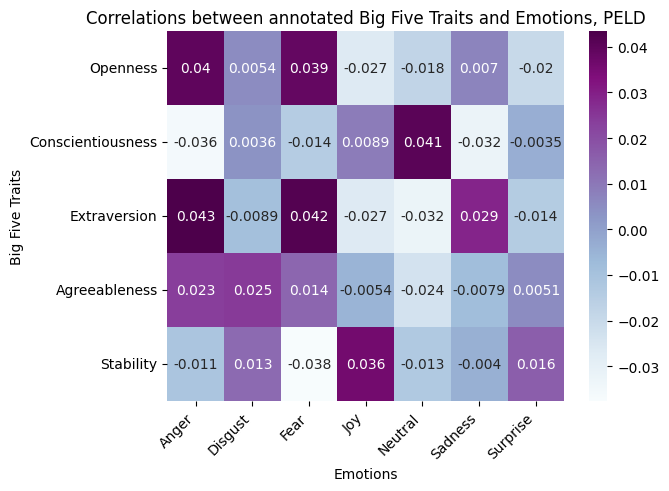

In [ ]:
df_PELD['Conscientiousness'] = df_PELD['Conscientiousness'].astype(float)
df_PELD['Openess'] = df_PELD['Openess'].astype(float)
df_PELD['Extraversion'] = df_PELD['Extraversion'].astype(float)
df_PELD['Stability'] = df_PELD['Stability'].astype(float)
df_PELD['Agreeableness'] = df_PELD['Agreeableness'].astype(float)

#Correlations
big_five_traits = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Stability']
emotions = ['Anger', 'Disgust','Fear', 'Joy', 'Neutral', 'Sadness', 'Surprise']
correlations = [
    [np.corrcoef(df_PELD['Anger'], df_PELD['Openess'])[0, 1], np.corrcoef(df_PELD['Disgust'], df_PELD['Openess'])[0, 1], np.corrcoef(df_PELD['Fear'], df_PELD['Openess'])[0, 1], np.corrcoef(df_PELD['Joy'], df_PELD['Openess'])[0, 1], np.corrcoef(df_PELD['Neutral'], df_PELD['Openess'])[0, 1], np.corrcoef(df_PELD['Sadness'], df_PELD['Openess'])[0, 1], np.corrcoef(df_PELD['Surprise'], df_PELD['Openess'])[0, 1] ],
    [np.corrcoef(df_PELD['Anger'], df_PELD['Conscientiousness'])[0, 1], np.corrcoef(df_PELD['Disgust'], df_PELD['Conscientiousness'])[0, 1], np.corrcoef(df_PELD['Fear'], df_PELD['Conscientiousness'])[0, 1], np.corrcoef(df_PELD['Joy'], df_PELD['Conscientiousness'])[0, 1], np.corrcoef(df_PELD['Neutral'], df_PELD['Conscientiousness'])[0, 1], np.corrcoef(df_PELD['Sadness'], df_PELD['Conscientiousness'])[0, 1], np.corrcoef(df_PELD['Surprise'], df_PELD['Conscientiousness'])[0, 1] ],
    [np.corrcoef(df_PELD['Anger'], df_PELD['Extraversion'])[0, 1], np.corrcoef(df_PELD['Disgust'], df_PELD['Extraversion'])[0, 1], np.corrcoef(df_PELD['Fear'], df_PELD['Extraversion'])[0, 1], np.corrcoef(df_PELD['Joy'], df_PELD['Extraversion'])[0, 1], np.corrcoef(df_PELD['Neutral'], df_PELD['Extraversion'])[0, 1], np.corrcoef(df_PELD['Sadness'], df_PELD['Extraversion'])[0, 1], np.corrcoef(df_PELD['Surprise'], df_PELD['Extraversion'])[0, 1] ],
    [np.corrcoef(df_PELD['Anger'], df_PELD['Agreeableness'])[0, 1], np.corrcoef(df_PELD['Disgust'], df_PELD['Agreeableness'])[0, 1], np.corrcoef(df_PELD['Fear'], df_PELD['Agreeableness'])[0, 1], np.corrcoef(df_PELD['Joy'], df_PELD['Agreeableness'])[0, 1], np.corrcoef(df_PELD['Neutral'], df_PELD['Agreeableness'])[0, 1], np.corrcoef(df_PELD['Sadness'], df_PELD['Agreeableness'])[0, 1], np.corrcoef(df_PELD['Surprise'], df_PELD['Agreeableness'])[0, 1] ],
    [np.corrcoef(df_PELD['Anger'], df_PELD['Stability'])[0, 1], np.corrcoef(df_PELD['Disgust'], df_PELD['Stability'])[0, 1], np.corrcoef(df_PELD['Fear'], df_PELD['Stability'])[0, 1], np.corrcoef(df_PELD['Joy'], df_PELD['Stability'])[0, 1], np.corrcoef(df_PELD['Neutral'], df_PELD['Stability'])[0, 1], np.corrcoef(df_PELD['Sadness'], df_PELD['Stability'])[0, 1], np.corrcoef(df_PELD['Surprise'], df_PELD['Stability'])[0, 1] ],
]

correlation_array = np.array(correlations)

#Heatmap
fig, ax = plt.subplots()

cmap = "BuPu"

sns.heatmap(correlation_array, annot=True, cmap=cmap, ax=ax)

ax.set_xticklabels(emotions, rotation=45, ha='right')

ax.set_yticklabels(big_five_traits, rotation=0)

ax.set_title('Correlations between annotated Big Five Traits and Emotions, PELD')
ax.set_xlabel('Emotions')
ax.set_ylabel('Big Five Traits')

plt.show()